2020-01-06, S. Haug, K. Sipos, University of Bern

# Tutorial 1.1 Basics with the Iris dataset

We do
- Install and load packages/libraries
- Read data from files and create tidy (tibble) data frames
- Index, select, filter, subset data
- Write data
- Get descriptive statistics
- Plotting

In the next tutorial we practise this in a text mining example.


## Install and load packages/libraries

Over decades experts have been writing R packages, also called libraries, which do almost everything we wish to do (in Python packages are called modules).

First let us see which R libraries are installed.

In [5]:
#library()

If a package we need isn't in the list, we need to install it. This is done like below. It takes some time indicated by the start next to the cell or the Busy at the bottom of the window. After installing, we need to load it with library()

In [9]:
#install.packages("tidytext")
library(tidytext)

The best way to lern about a package is to google its documentation. Google tidytext!

However, you may get some information about your package like this:

In [ ]:
#package?tidytext #help(package = "tidytext")

## Read data from files and create tidy data frames (tibbles)

Among various data types, the main data type in data science is the data frame. Some data types:

- Scalar
- Vector
- Matrix
- Array
- **Data Frame**

In R the data frame to use the so called tidy or tibble data frame which is created with functions from the tibble package

https://www.rdocumentation.org/packages/tibble/versions/1.4.2 

We start with fameous Iris dataset. It contains the measurements of the length and the width of two different leaves on the Iris flowers in centimeters. There 50 measurements for three different species, i.e. the dataset has 150 rows.

To read and write files we need the package readr:

In [15]:
library(readr)

Most data is provided in flat files like comma separated value file (cvs). Excel files are such. To read them one can use https://www.rdocumentation.org/packages/readr/versions/1.3.1/topics/read_delim

In [18]:
iris_df <- read_delim("Data-Iris.csv",",",col_names=c("slength","swidth","plength","pwidth","species")
)

Parsed with column specification:
cols(
  slength = col_double(),
  swidth = col_double(),
  plength = col_double(),
  pwidth = col_double(),
  species = col_character()
)



Let us see if iris_df is already a data frame and then inspect the data frame in various ways:

In [20]:
is_tibble(iris_df)

[1] TRUE

In [22]:
head(iris_df)
#print(iris_df)
#print(iris_df, n=5)
#print(iris_df, n=7, width = Inf)
#glimpse(iris_df)

slength,swidth,plength,pwidth,species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


Now that we have our data in a data frame, we want to be able to manupilate it. Examples are subsetting, i.e. selecting parts of the data by indexing and filtering.

## Selecting data (Filtering/Subsetting by Indexing)

This is how one index on data frames:

In [23]:
#iris_df$Sepal.Length         # column by name
#iris_df[["Sepal.Length"]]    # column by name
#iris_df[[1]]                 # column by position
#iris_df[1,3]                  # element by positions
iris_df[1:5,2:4]

swidth,plength,pwidth
<dbl>,<dbl>,<dbl>
3.5,1.4,0.2
3.0,1.4,0.2
3.2,1.3,0.2
3.1,1.5,0.2
3.6,1.4,0.2


This is how you can make a new dataframe containing only the rows with Iris-setosa data:

In [27]:
setosa_df <- iris_df[iris_df$species=="Iris-setosa",] # Take all the rows with setosa

In [140]:
print(setosa_df,n=5)

# A tibble: 50 x 5
  slength swidth plength pwidth species    
    <dbl>  <dbl>   <dbl>  <dbl> <chr>      
1     5.1    3.5     1.4    0.2 Iris-setosa
2     4.9    3       1.4    0.2 Iris-setosa
3     4.7    3.2     1.3    0.2 Iris-setosa
4     4.6    3.1     1.5    0.2 Iris-setosa
5     5      3.6     1.4    0.2 Iris-setosa
# … with 45 more rows


## Write the setosa subset to file

https://www.rdocumentation.org/packages/readr/versions/0.1.1/topics/write_csv

In [28]:
#write_csv(setosa_df,"setosa_df.csv")

Make sure that the file is created and inspect it!

## Plotting

Visualising the data is a very important task in the data science process. Humans are bad in reading large tables, but very good in interpreting plots and pictures. 

There are many types of plots. Let's look at histograms, box plots and scatter plots. 

### Histograms

Create a histogram of column 1 of our setosa dataset with the hist function:
https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/hist

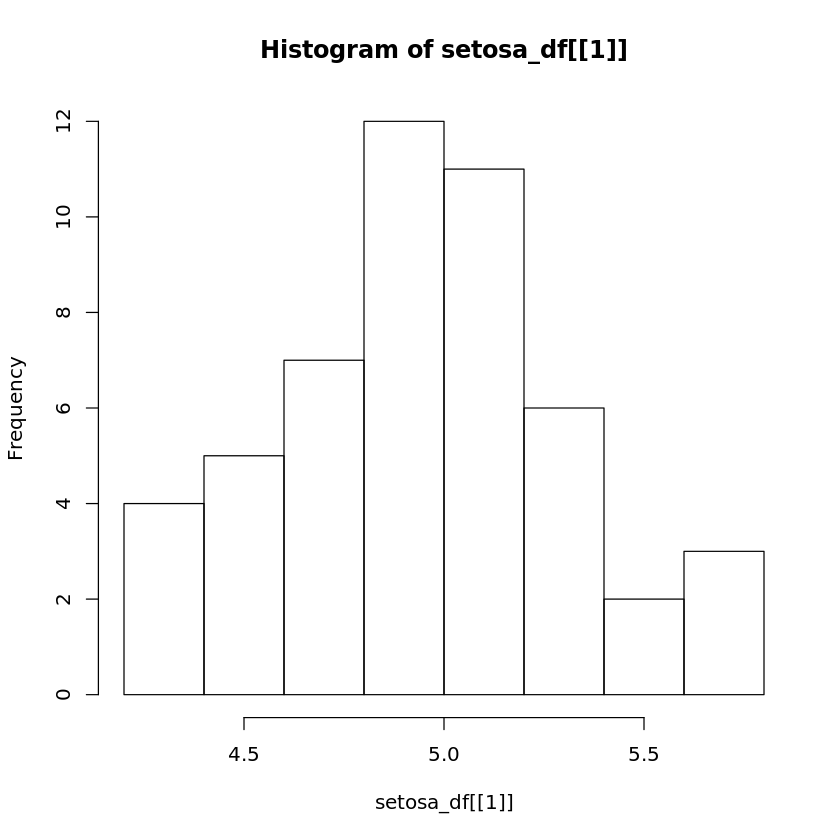

In [33]:
hist(setosa_df[[1]])

In [34]:
#install.packages("ggplot")
library(ggplot2) # for using the more advanced plotting package

https://www.rdocumentation.org/packages/ggplot2/versions/3.2.1/topics/qplot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



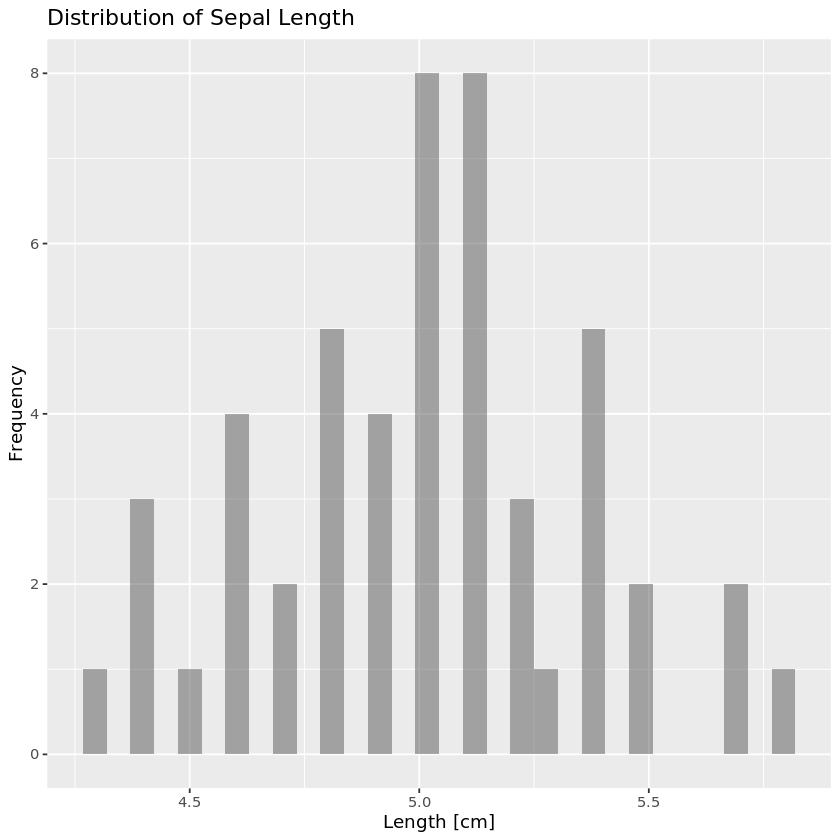

In [38]:
#qplot(slength, data = setosa_df, geom="density", alpha=I(.5))
#qplot(slength, data = setosa_df, geom="histogram", alpha=I(.5))
qplot(slength, data = setosa_df, geom="histogram", alpha=I(.5), main="Distribution of Sepal Length", xlab="Length [cm]", ylab="Frequency")
#qplot(slength, data = setosa_df, geom="histogram", alpha=I(.5))


### Scatter Plots

Plot a scatter plot with qplot

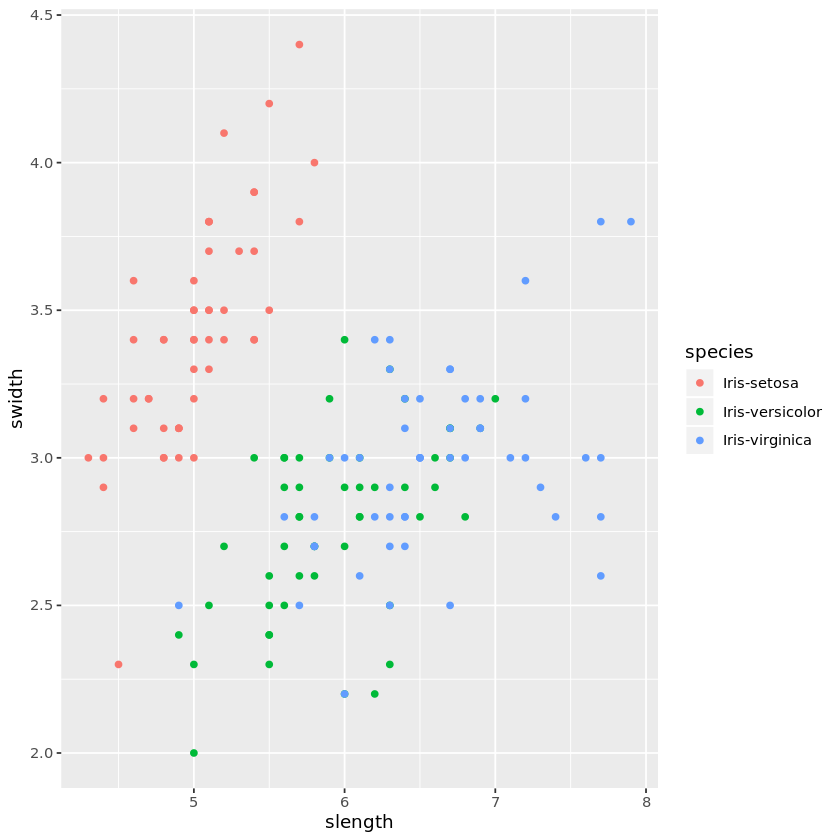

In [161]:
qplot(slength,swidth, data=iris_df, colour=species)

Looking for correlations in data is normally one of the first things one does. Let us make a data frame with the correlatio matrix of the setosa data:


In [40]:
cor_matrix<-cor(setosa_df[,1:4])

Now we can use the package PerformanceAnalystics to visualise the correlations.

In [42]:
#install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

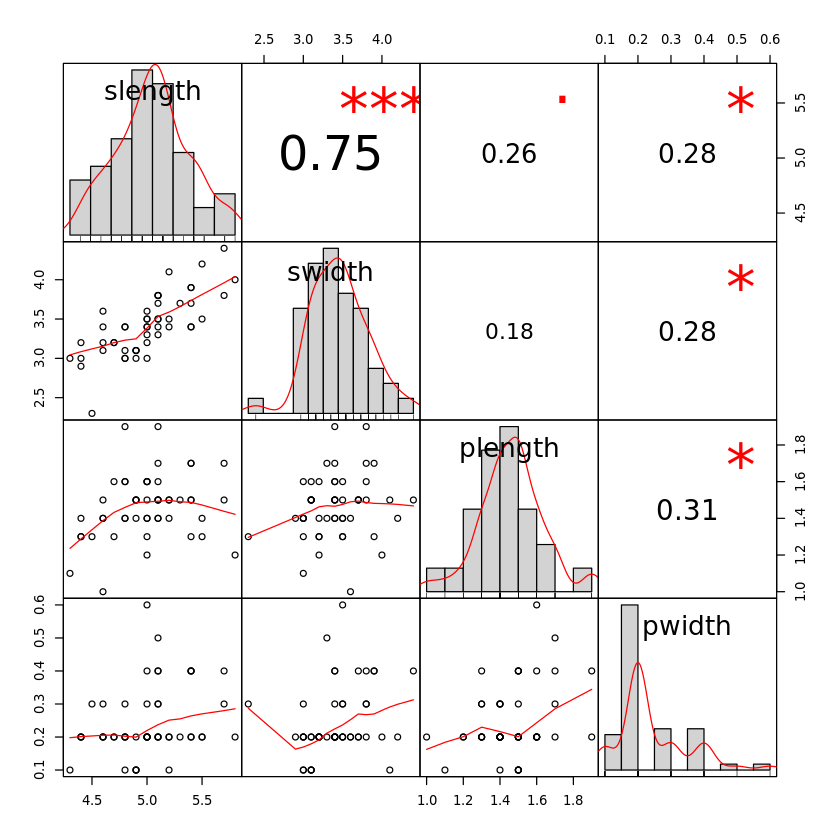

In [44]:
#chart.Correlation(setosa_df[,1:4], histogram=TRUE, pch=19)
chart.Correlation(setosa_df[,1:4], histogram=TRUE)

### Compare groups with box plots

Various plotting examples, also with box plots, you find here
http://www.sthda.com/english/wiki/qplot-quick-plot-with-ggplot2-r-software-and-data-visualization

Here we we compare the sepal length of the three iris species: 

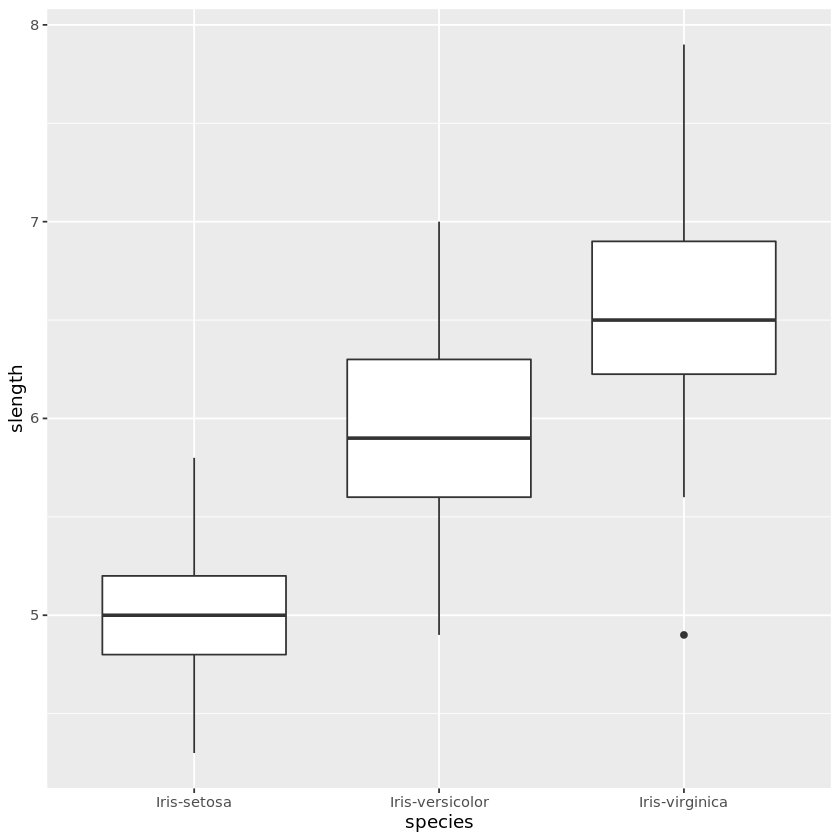

In [46]:
qplot(species, slength, data=iris_df, geom = "boxplot")

## Descriptive Statistics

Get summary statistics, see examples here:
https://www.statmethods.net/stats/descriptives.html

In [165]:
#sapply(setosa_df, mean) # only mean value
summary(setosa_df)

    slength          swidth         plength          pwidth     
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:4.800   1st Qu.:3.125   1st Qu.:1.400   1st Qu.:0.200  
 Median :5.000   Median :3.400   Median :1.500   Median :0.200  
 Mean   :5.006   Mean   :3.418   Mean   :1.464   Mean   :0.244  
 3rd Qu.:5.200   3rd Qu.:3.675   3rd Qu.:1.575   3rd Qu.:0.300  
 Max.   :5.800   Max.   :4.400   Max.   :1.900   Max.   :0.600  
   species         
 Length:50         
 Class :character  
 Mode  :character  
                   
                   
                   

An example how the psych package can give summaries per group:

In [50]:
library(psych)
describeBy(iris_df, group = "species")

Warning message in FUN(data[x, , drop = FALSE], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(data[x, , drop = FALSE], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(data[x, , drop = FALSE], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”



 Descriptive statistics by group 
species: Iris-setosa
         vars  n mean   sd median trimmed  mad min  max range skew kurtosis
slength     1 50 5.01 0.35    5.0    5.00 0.30 4.3  5.8   1.5 0.11    -0.45
swidth      2 50 3.42 0.38    3.4    3.40 0.44 2.3  4.4   2.1 0.10     0.54
plength     3 50 1.46 0.17    1.5    1.46 0.15 1.0  1.9   0.9 0.07     0.66
pwidth      4 50 0.24 0.11    0.2    0.24 0.00 0.1  0.6   0.5 1.13     1.13
species*    5 50  NaN   NA     NA     NaN   NA Inf -Inf  -Inf   NA       NA
           se
slength  0.05
swidth   0.05
plength  0.02
pwidth   0.02
species*   NA
------------------------------------------------------------ 
species: Iris-versicolor
         vars  n mean   sd median trimmed  mad min  max range  skew kurtosis
slength     1 50 5.94 0.52   5.90    5.94 0.52 4.9  7.0   2.1  0.10    -0.69
swidth      2 50 2.77 0.31   2.80    2.78 0.30 2.0  3.4   1.4 -0.34    -0.55
plength     3 50 4.26 0.47   4.35    4.29 0.52 3.0  5.1   2.1 -0.57    -0.19
pwidth   

# Getting help and learning more

Use your favourite search engine and add R to your question. Or go directly:

- https://www.rdocumentation.org/
- https://r4ds.had.co.nz/
- https://www.tidytextmining.com/